In [90]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron # Import the Perceptron classifier
from sklearn.datasets import load_iris     # Changed to load_iris dataset
from sklearn.model_selection import train_test_split

In [91]:
iris = load_iris()


In [92]:
#  only the first two features (sepal length and sepal width)
# and only the first two classes (setosa and versicolor) which are linearly separable.
X = iris.data[iris.target < 2, :2] # Features for Setosa (0) and Versicolor (1)
y = iris.target[iris.target < 2]   # Corresponding labels

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [94]:
# The Perceptron is a simple linear classifier.
# max_iter: The maximum number of passes over the training data (epochs).
# tol: The stopping criterion. The iteration will stop when the loss is not improving by at least tol.
# random_state: For reproducibility.
perceptron = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
perceptron.fit(X_train, y_train)

Perceptron(random_state=42)

In [95]:
# --- 3. Create a Meshgrid for Plotting the Decision Boundary ---
# This creates a grid of points over the entire feature space.
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

In [96]:
# Flatten the meshgrid points for prediction
Z_perceptron = perceptron.predict(np.c_[xx.ravel(), yy.ravel()])
Z_perceptron = Z_perceptron.reshape(xx.shape) # Reshape predictions back to grid for contour plotting

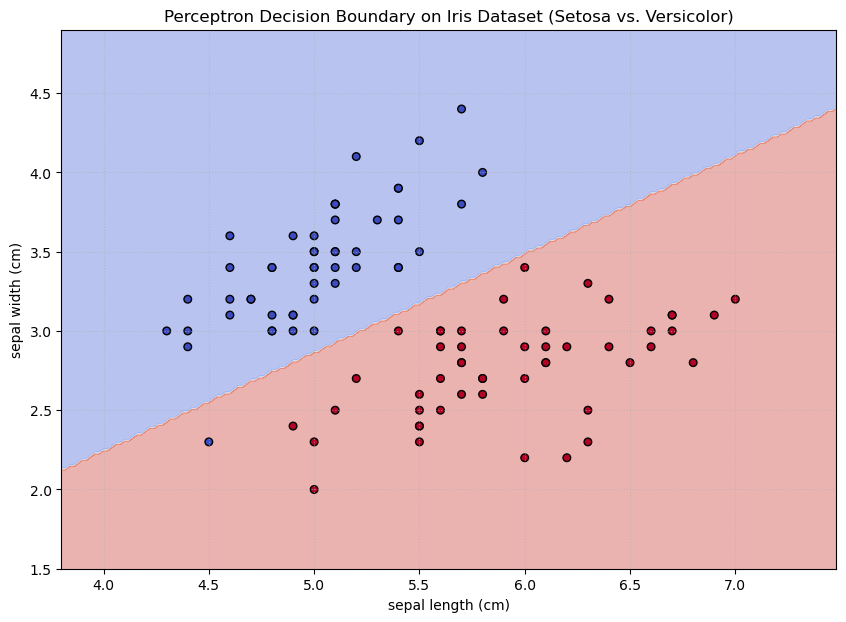

In [97]:

# --- 4. Visualize the Decision Boundary and Data Points ---
plt.figure(figsize=(10, 7))

# Plot the decision boundary of the Perceptron (filled contours)
plt.contourf(xx, yy, Z_perceptron, alpha=0.4, cmap=plt.cm.coolwarm)
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, edgecolors='k', cmap=plt.cm.coolwarm)

# Adding proper axis labels from the Iris dataset
plt.title('Perceptron Decision Boundary on Iris Dataset (Setosa vs. Versicolor)')
plt.xlabel(iris.feature_names[0]) # 'sepal length (cm)'
plt.ylabel(iris.feature_names[1]) # 'sepal width (cm)'
plt.grid(True, linestyle=':', alpha=0.6)
plt.show()


In [98]:

# --- Perceptron parameters and performance ---
print("\n--- Perceptron Model Details ---")
print(f"Number of iterations to converge: {perceptron.n_iter_}")
print(f"Perceptron accuracy on test set: {perceptron.score(X_test, y_test):.4f}")
print(f"Coefficients (weights): {perceptron.coef_}")
print(f"Intercept (bias): {perceptron.intercept_}")



--- Perceptron Model Details ---
Number of iterations to converge: 18
Perceptron accuracy on test set: 1.0000
Coefficients (weights): [[ 28.4 -45.7]]
Intercept (bias): [-11.]


In [99]:



print("\n--- Visual Explanation ---")
print("This visualization demonstrates the decision boundary of a simple Perceptron classifier using a subset of the **Iris dataset**.")
print("1.  **Data Points:** We're specifically using the 'setosa' (class 0) and 'versicolor' (class 1) species, plotted based on their 'sepal length' and 'sepal width'. These two classes are known to be **linearly separable**.")
print("2.  **Perceptron Decision Boundary:** The Perceptron has learned a single **straight line** to separate the two types of iris flowers. The shaded regions indicate how the Perceptron would classify new points based on this boundary.")
print("    This effectively showcases the Perceptron's ability to find a linear separation when one exists.")
print("\n**Key Takeaway:** The Perceptron is a fundamental linear classifier that excels at finding clear linear boundaries in data. This example with the Iris dataset provides a good real-world context for its application.")



--- Visual Explanation ---
This visualization demonstrates the decision boundary of a simple Perceptron classifier using a subset of the **Iris dataset**.
1.  **Data Points:** We're specifically using the 'setosa' (class 0) and 'versicolor' (class 1) species, plotted based on their 'sepal length' and 'sepal width'. These two classes are known to be **linearly separable**.
2.  **Perceptron Decision Boundary:** The Perceptron has learned a single **straight line** to separate the two types of iris flowers. The shaded regions indicate how the Perceptron would classify new points based on this boundary.
    This effectively showcases the Perceptron's ability to find a linear separation when one exists.

**Key Takeaway:** The Perceptron is a fundamental linear classifier that excels at finding clear linear boundaries in data. This example with the Iris dataset provides a good real-world context for its application.
